# 데이터 출력

In [0]:
import csv
f = open('seoul.csv', encoding='cp949')
data = csv.reader(f)
i  = 0;
for row in data :
  print(row)
  if i == 10:
    break
  i = i + 1;
f.close()

['날짜', '지점', '평균기온(℃)', '최저기온(℃)', '최고기온(℃)']
['1907.10.1', '108', '13.5', '7.9', '20.7']
['1907.10.2', '108', '16.2', '7.9', '22']
['1907.10.3', '108', '16.2', '13.1', '21.3']
['1907.10.4', '108', '16.5', '11.2', '22']
['1907.10.5', '108', '17.6', '10.9', '25.4']
['1907.10.6', '108', '13', '11.2', '21.3']
['1907.10.7', '108', '11.3', '6.3', '16.1']
['1907.10.8', '108', '8.9', '3.9', '14.9']
['1907.10.9', '108', '11.6', '3.8', '21.1']
['1907.10.10', '108', '14.2', '6.4', '24.1']


#헤더 저장


> 헤더는 출력되지 않음



In [0]:
import csv
f = open('seoul.csv', encoding='cp949')
data = csv.reader(f)
header = next(data)
i  = 0;
for row in data :
  print(row)
  if i == 10:
    break
  i = i + 1;
f.close()

['1907.10.1', '108', '13.5', '7.9', '20.7']
['1907.10.2', '108', '16.2', '7.9', '22']
['1907.10.3', '108', '16.2', '13.1', '21.3']
['1907.10.4', '108', '16.5', '11.2', '22']
['1907.10.5', '108', '17.6', '10.9', '25.4']
['1907.10.6', '108', '13', '11.2', '21.3']
['1907.10.7', '108', '11.3', '6.3', '16.1']
['1907.10.8', '108', '8.9', '3.9', '14.9']
['1907.10.9', '108', '11.6', '3.8', '21.1']
['1907.10.10', '108', '14.2', '6.4', '24.1']
['1907.10.11', '108', '15.4', '10.1', '20.4']


# Q1. 서울이 가장 더웠던 날은? (1904 - 2019)
> 결측값 보강: -999로 최고기온에 영향을 미치지 못하도록

In [0]:
import csv
f = open('seoul.csv', encoding='cp949')
data = csv.reader(f)
header = next(data)
i  = 0;
for row in data :
  if row[-1] == ''  :
    row[-1] = -999
  row[-1] = float(row[-1])
  if row[-1] > max_temp :
    max_temp = row[-1]
    max_date = row[0]
f.close()
print('기상 관측 이래 서울의 최고 기온이 가장 높았던 날은', max_date+'로, ',max_temp,'도 였습니다.')

기상 관측 이래 서울의 최고 기온이 가장 높았던 날은 2018.8.1로,  39.6 도 였습니다.


#Q2. 내 생일의 기온 변화를 그래프로 시각화하기

In [0]:
import csv
f = open('seoul.csv', encoding='cp949')
data = csv.reader(f)
next(data)
high = [] # 최고 기온 데이터 리스트에 저장
low = [] # 최저 기온 데이터 리스트에 저장

for row in data :
  if row[-1] != ''  and row[-2] != '':
    date = row[0].split('.')
    if int(date[0]) >= 1997 :
      if(date[1] == '8' and date[2] == '27')  :
        high.append(float(row[-1]))
        low.append(float(row[-2]))

print(len(high)) #high에 저장된 데이터의 개수 출력
print(len(low)) #low에 저장된 데이터의 개수 출력

23
23


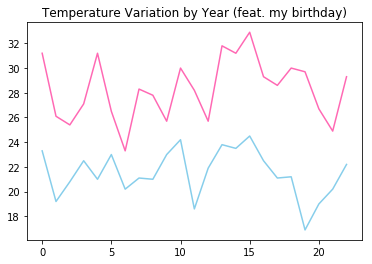

In [0]:
import matplotlib.pyplot as plt

plt.title('Temperature Variation by Year (feat. my birthday)')
plt.plot(high, 'hotpink')
plt.plot(low, 'skyblue')
plt.show()

#Q3. 최고기온 데이터를 히스토그램으로 표현하기 (매일)

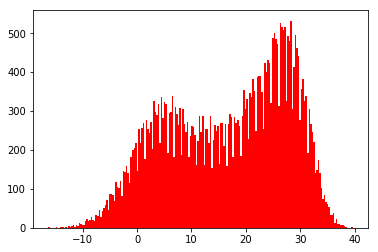

In [0]:
import csv
import matplotlib.pyplot as plt

f = open('seoul.csv', encoding='cp949')
data = csv.reader(f)
next(data)
result = []

for row in data :
  if row[-1] != '' :
    result.append(float(row[-1]))

plt.hist(result, bins = 200, color = 'r')
plt.show()

#Q4. 최고기온 데이터를 히스토그램으로 표현하기 (1월 & 8월)


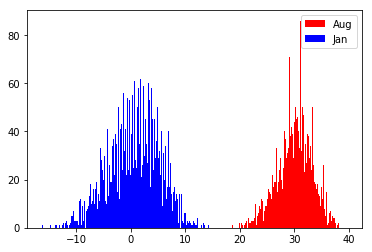

In [0]:
import csv
import matplotlib.pyplot as plt

f = open('seoul.csv', encoding='cp949')
data = csv.reader(f)
next(data)

aug = []
jan = []

for row in data :
  month = row[0].split('.')[1]
  if row[-1] != '' :
    if month == '8' :
      aug.append(float(row[-1]))
    if month == '1' :
      jan.append(float(row[-1]))

plt.hist(aug, bins=200, color='r', label='Aug')
plt.hist(jan, bins=200, color='b', label='Jan')
plt.legend()
plt.show()